In [1]:
import numpy as np
from sus.protocol_designer import System, Protocol, Potential, Compound_Protocol
from sus.protocol_designer.protocol import sequential_protocol
from IPython import display
from IPython.display import HTML
from quick_sim import setup_sim
from edward_tools.coupled_fq_potential import coupled_flux_qubit_pot, coupled_flux_qubit_force, coupled_fq_pot
import edward_tools.fq_runner as fq_runner
from edward_tools.visualization import animate_sim_flux_qubit

import kyle_tools as kt
import matplotlib.pyplot as plt
from quick_sim import setup_sim

import importlib, os, hashlib, json, datetime
from edward_tools import coupled_fq_protocol_library, cfq_runner
from PARAMETER_INPUT import *
from PARAMETER_INPUT import _lambda, _theta, _eta
from ControlParameter import *

import edward_tools.cfq_batch_sweep as cfq_batch_sweep
%load_ext jupyternotify

coupled_fq_protocol_library = importlib.reload(coupled_fq_protocol_library)
create_system = coupled_fq_protocol_library.create_system
get_potential_shot_at_different_t = coupled_fq_protocol_library.get_potential_shot_at_different_t
get_potential_shot_at_different_t_1D = coupled_fq_protocol_library.get_potential_shot_at_different_t_1D
create_simple_protocol_parameter_dict = coupled_fq_protocol_library.create_simple_protocol_parameter_dict
create_system_from_storage_and_computation_protocol = coupled_fq_protocol_library.create_system_from_storage_and_computation_protocol
coupled_fq_runner = importlib.reload(cfq_runner)
coupled_fq_protocol_library = importlib.reload(coupled_fq_protocol_library)
create_system = coupled_fq_protocol_library.create_system


<IPython.core.display.Javascript object>

# --------------------- separatiing line --------------------- #

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# fidelity analysis

## to plot the 4 grid pictures

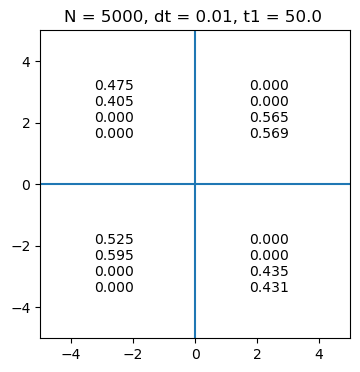

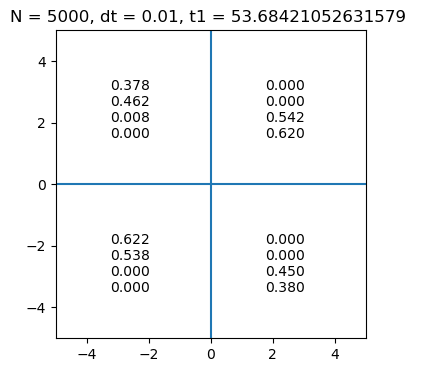

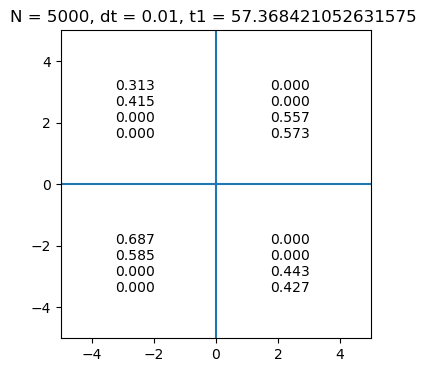

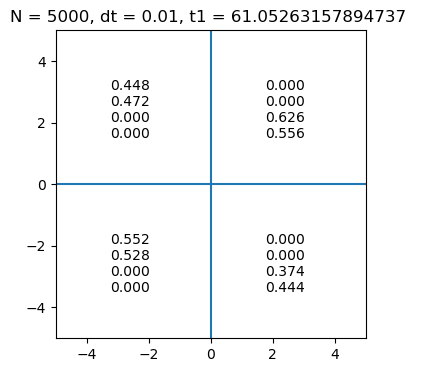

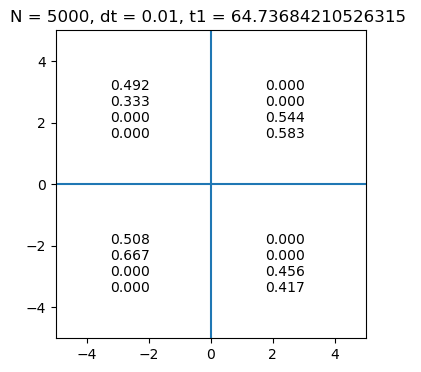

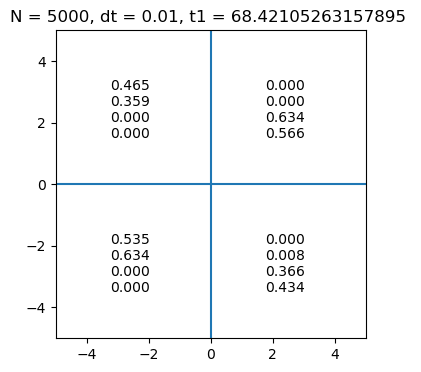

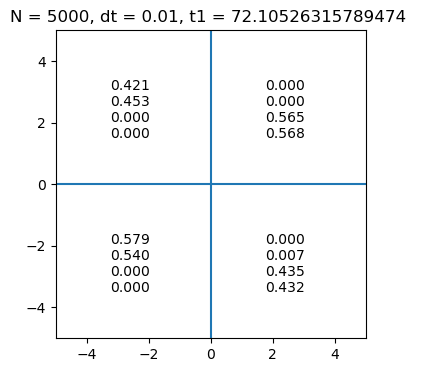

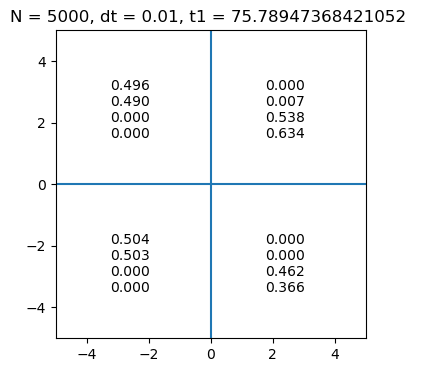

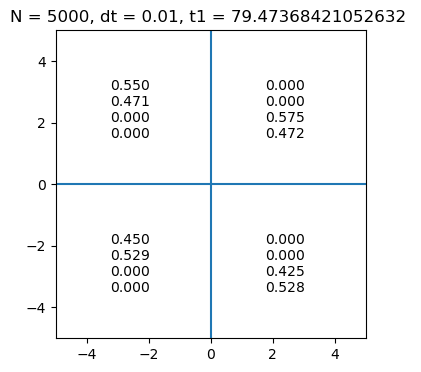

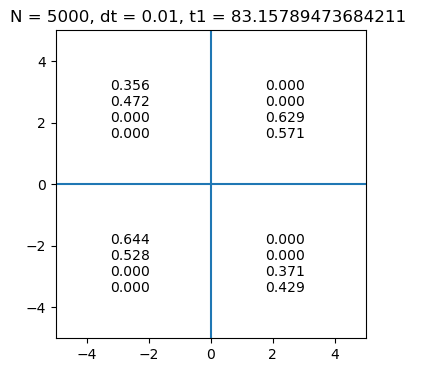

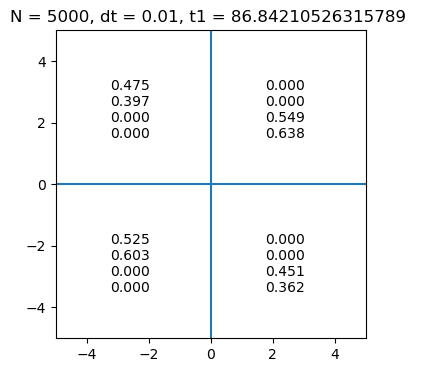

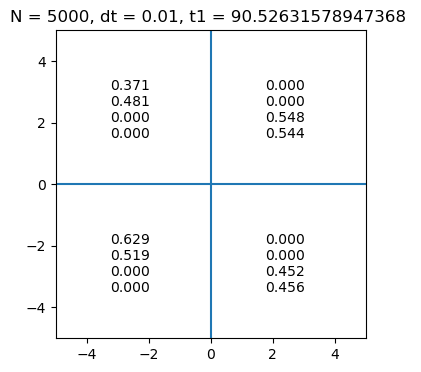

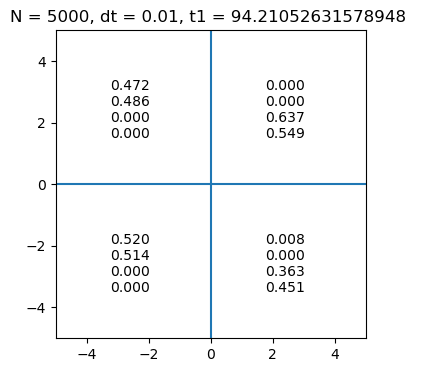

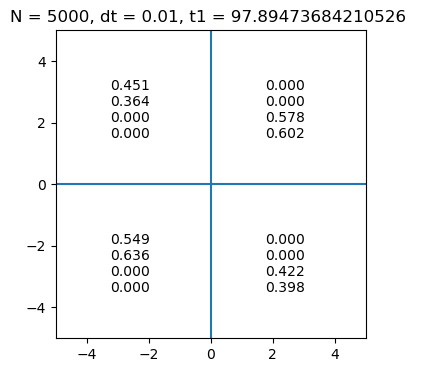

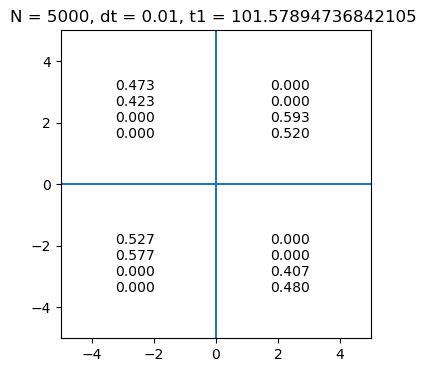

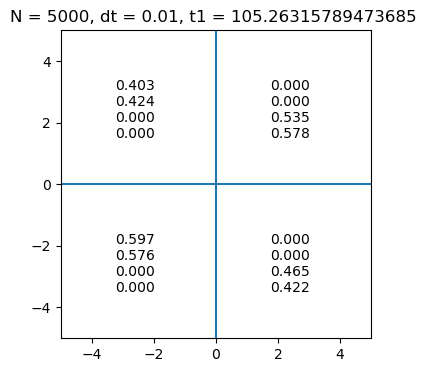

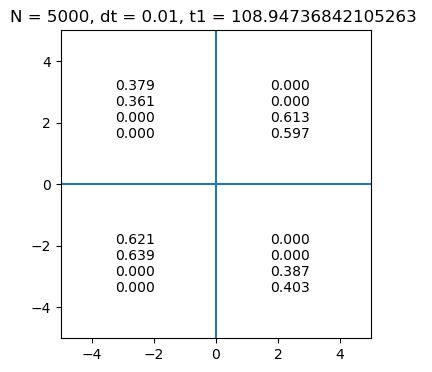

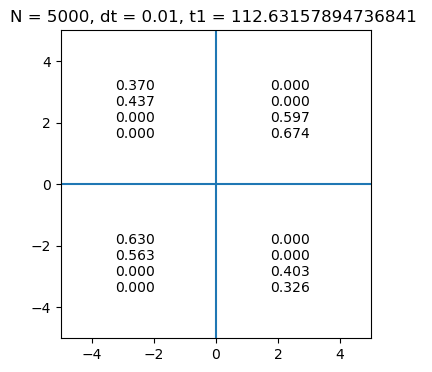

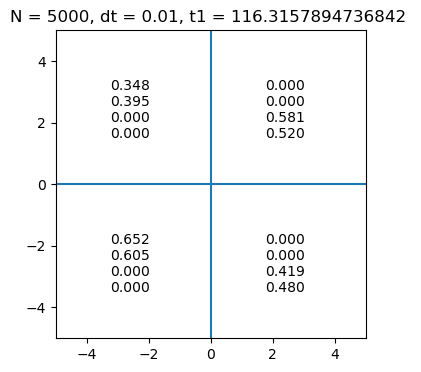

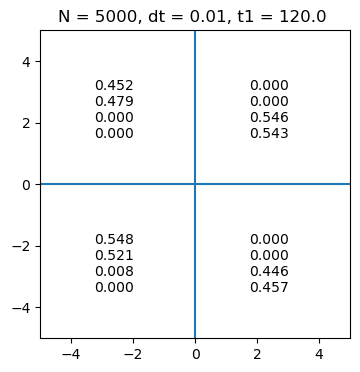

In [136]:

import json
import numpy as np
import matplotlib.pyplot as plt
with open("cfq_data/fidelity_analysis.json") as f:
    data = json.load(f)
    for item in data:
        final_percentage_matrix = np.array([d["final_percentage"] for d in item["fidelity"]]).T
        text_box_array = ["\n".join(row) for row in final_percentage_matrix]
        plt.figure(figsize=[4, 4])
        plt.title(f"N = {item['N']}, dt = {item['dt']}, t1 = {item['protocol_list'][-1]['duration']} ")
        plt.xlim(-5, 5);plt.ylim(-5, 5);
        plt.text(-3.25, -3.5, text_box_array[0]);plt.text(-3.25, 1.5, text_box_array[1])
        plt.text(1.75, -3.5, text_box_array[2]);plt.text(1.75, 1.5, text_box_array[3])
        plt.vlines(0, ymin = -5, ymax = 5);plt.hlines(0, xmin = -5, xmax = 5)
    # plt.show()

In [22]:
d = {"3": 10}

In [29]:
list(d.values())[0]

10

## plot them in line graphs

In [ ]:

import json
import numpy as np
import matplotlib.pyplot as plt

bit_array = ["00", "01", "10", "11"]
expt_number = 32

with open("cfq_data/fidelity_r_analysis_step_1_to_6.json") as f:
    data = json.load(f)
    data = list(filter(lambda x: x["expt_number"]==expt_number, data))
    # data = list(filter(lambda x: x["tested_parameter_value"] < 0.84 and x["tested_parameter_value"] > 0.82, data))
    final_percentage_matrix_at_all_time = []
    parameter_array = [item['tested_parameter_value'] for item in data]
    mean_work =  [item['W_mean'] for item in data]
    for item in data:
        final_percentage_matrix = np.array([d["final_percentage"] for d in item["fidelity"]])
        final_percentage_matrix_at_all_time.append(final_percentage_matrix)
    final_percentage_matrix_at_all_time = np.array(final_percentage_matrix_at_all_time).astype("float")

In [ ]:
plt.title("mean work and time length for step 1")
plt.xlabel("r"); plt.ylabel("W_mean")
plt.scatter(parameter_array, mean_work)
print("min work = ", min(mean_work))


In [10]:
data[10]

{'N': 10000,
 'dt': 0.01,
 'protocol_list': [{'duration': 34.421052631578945,
   'phi_1_dcx': 3.0,
   'phi_2_dcx': 0,
   'M_12': 0,
   'name': '(5) mix in x direction'},
  {'duration': 50, 'name': 'rest'}],
 'W_mean': 1.9473547776477724,
 'W_std': 0.00533455875510251,
 'jarzyn': 0.17109865486731243,
 'jarzyn_error': 0.000760979694685803,
 'fidelity': [{'initial': [4941, 0, 0, 0],
   'final': [1903, 0, 3038, 0],
   'final_percentage': ['0.385', '0.000', '0.615', '0.000']},
  {'initial': [0, 0, 0, 0],
   'final': [0, 0, 0, 0],
   'final_percentage': ['nan', 'nan', 'nan', 'nan']},
  {'initial': [0, 0, 0, 0],
   'final': [0, 0, 0, 0],
   'final_percentage': ['nan', 'nan', 'nan', 'nan']},
  {'initial': [0, 0, 0, 5059],
   'final': [0, 3074, 0, 1985],
   'final_percentage': ['0.000', '0.608', '0.000', '0.392']}],
 'simulation_data': {'simulation_time': 64.61852192878723,
  'simulation_date': '2024-01-02',
  'simulation_id': '21b28315ec8666f0693974927948daac1641d80b9b181ef1ad6d5f96b9942630'},

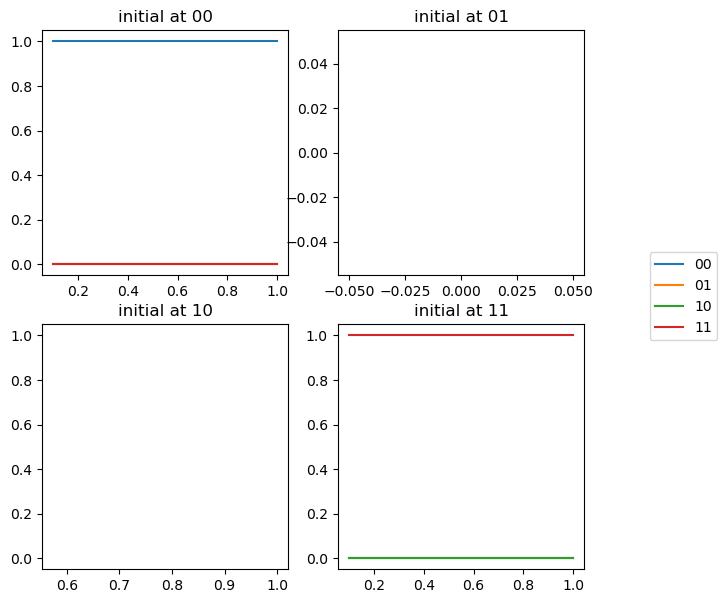

In [48]:
sorted(zip(parameter_array, final_percentage_matrix_at_all_time), key=lambda x: x[0])

fig, ax = plt.subplots(2, 2, figsize=(7,7))
ax = ax.flatten()

# i_index and f_index means initial and final indices
for i_index in range(0, 4):
    ax[i_index].title.set_text(f'initial at {bit_array[i_index]}')
    for f_index in range(0, 4):
        ax[i_index].plot(parameter_array, final_percentage_matrix_at_all_time[:, i_index, f_index], label=bit_array[f_index])
    #     
    
    #     ax[index].plot(time_array, row, label = bit_array[index])
    #     ax[index].title.set_text(f'initial at {bit_array[index]}')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = 5, bbox_to_anchor=(1.1, 0.5))



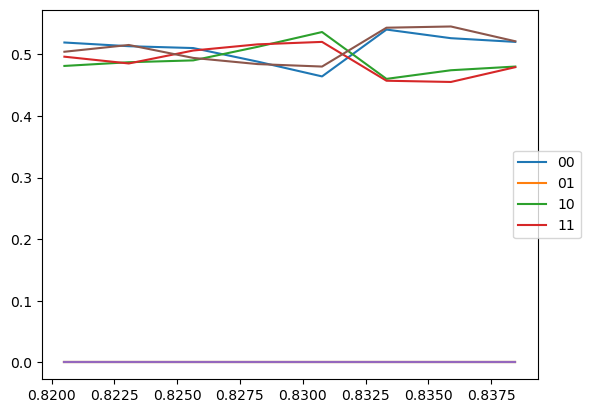

In [31]:




for i_index in range(0, 4):
    ax[i_index].title.set_text(f'initial at {bit_array[i_index]}')
    for f_index in range(0, 4):
        plt.plot(parameter_array, final_percentage_matrix_at_all_time[:, i_index, f_index], label=bit_array[f_index])
plt.legend(handles, labels, loc = 5, bbox_to_anchor=(1.1, 0.5))



In [11]:
final_percentage_matrix_at_all_time

array([[[ 1.,  0.,  0.,  0.],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [ 0.,  0.,  0.,  1.]],

       [[ 1.,  0.,  0.,  0.],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [ 0.,  0.,  0.,  1.]],

       [[ 1.,  0.,  0.,  0.],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [ 0.,  0.,  0.,  1.]],

       [[ 1.,  0.,  0.,  0.],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [ 0.,  0.,  0.,  1.]],

       [[ 1.,  0.,  0.,  0.],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [ 0.,  0.,  0.,  1.]],

       [[ 1.,  0.,  0.,  0.],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [ 0.,  0.,  0.,  1.]],

       [[ 1.,  0.,  0.,  0.],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [ 0.,  0.,  0.,  1.]],

       [[ 1.,  0.,  0.,  0.],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [ 0.,  0.,  0.,  1.]],

       [[ 1.,  0.,  0., 

In [66]:
bit_array = ["00", "01", "10", "11"]

## plot the work done

In [32]:
import json
import numpy as np
import matplotlib.pyplot as plt

bit_array = ["00", "01", "10", "11"]
expt_number = 5

# with open("cfq_data/WD_analysis_step_1_to_6.json") as f:
#     data = json.load(f)
#     data = list(filter(lambda x: x["expt_number"]==expt_number, data))
#     final_percentage_matrix_at_all_time = []
#     parameter_array = [item['tested_parameter_value'] for item in data]
#     mean_work =  [item['W_mean'] for item in data]
#     for item in data:
#         final_percentage_matrix = np.array([d["final_percentage"] for d in item["fidelity"]])
#         final_percentage_matrix_at_all_time.append(final_percentage_matrix)
#     final_percentage_matrix_at_all_time = np.array(final_percentage_matrix_at_all_time).astype("float")

In [33]:
import pandas as pd

In [34]:
df1 = pd.read_json("cfq_data/WD_analysis_step_1_to_6.json")

In [35]:
expt_df = df1[df1["expt_number"] == expt_number]

In [36]:
np.std(expt_df["W_mean"])

0.004469824684454098

In [37]:
np.mean(expt_df["W_mean"])

1.8816388042140084

In [40]:
1.973 - 3.043 -4.479 + 6.471 + 1.882 -1.602



1.2019999999999993